# Data Augmentation and Visualization for XRay
In this project, we will learn to classify pneumonia using Chest X-Ray dataset which can be downloaded from [here](https://www.dropbox.com/s/cwvaqip12wpex6o/Lab7_XRay_chest_pnemonia.zip?dl=0). This data is already split into train, test and validation directories, so you do not have to split it yourself! (One less task 😜). There are two sub-directories under each directory: `NORMAL` and	`PNEUMONIA`




# Part I
Train a Convolutional Neural Network (CNN) with and without data augmentation


In [64]:
# IMPORTS HERE
import pandas as pd
import numpy as np
from google.colab import drive
import os
import glob

# Image plots related
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import random # For randomizing

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from keras.models import load_model
from skimage import morphology, color, io, exposure
import cv2
from skimage import transform, io, img_as_float, exposure, img_as_ubyte

from keras.models import Sequential, Model
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

from keras.applications.densenet import DenseNet121
from keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers


## Task 1: 
Mount Google Drive

In [6]:
drive.mount('/content/drive') # Mounting Drive

Mounted at /content/drive


## Task 2: 
Define directories for train, test, validation

In [7]:
# Directories for train, val and test respectively
train_path = "/content/drive/My Drive/Lab 7/XRay_chest_pnemonia/train" 
val_path = "/content/drive/My Drive/Lab 7/XRay_chest_pnemonia/val" 
test_path = "/content/drive/My Drive/Lab 7/XRay_chest_pnemonia/test" 

## Task 3: 
Visualize some images from train set and plot class distribution of all sets using bar plots 

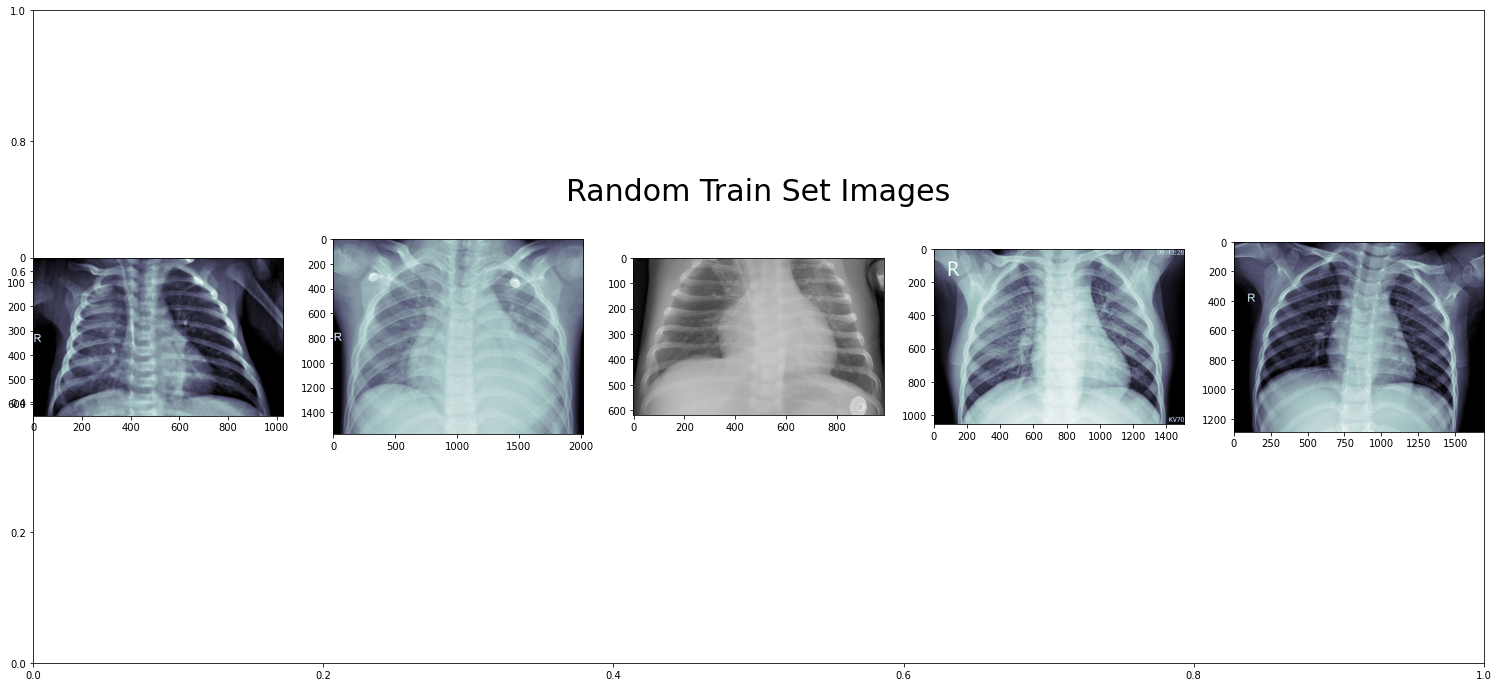

In [8]:
# Images from train set
train_file_path=glob.glob(train_path+'/**/*.jpeg',recursive=True)
fig = plt.figure(num=None, figsize=(26, 12))
a=1
plt.title('Random Train Set Images',y = 0.7,fontsize=30)
for i in range(5):
  num = random.randint(0,len(train_file_path))
  path = train_file_path[num]
  img = mpimg.imread(path)
  ax = fig.add_subplot(1,5,a)
  imgplot=plt.imshow(img,cmap='bone')
  a+=1

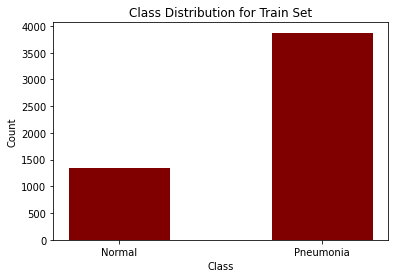

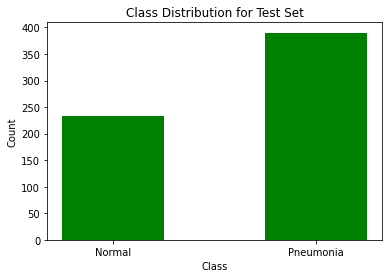

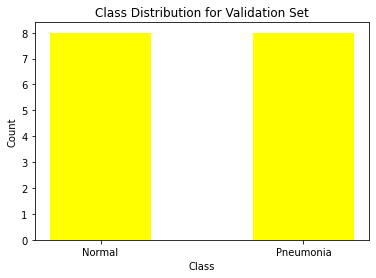

In [9]:
# Class Distribution for train, test and val
Classes = ['Normal','Pneumonia']
train_dist = [len(os.listdir(train_path+'/NORMAL')),len(os.listdir(train_path+'/PNEUMONIA'))]
test_dist = [len(os.listdir(test_path+'/NORMAL')),len(os.listdir(test_path+'/PNEUMONIA'))]
val_dist = [len(os.listdir(val_path+'/NORMAL')),len(os.listdir(val_path+'/PNEUMONIA'))]

plt.bar(Classes,train_dist,color='maroon',width=0.5)
plt.title('Class Distribution for Train Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.bar(Classes,test_dist,color='green',width=0.5)
plt.title('Class Distribution for Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.bar(Classes,val_dist,color='yellow',width=0.5)
plt.title('Class Distribution for Validation Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




## Task 4:
Train a Convoluational Neural Network (CNN) using data loaders. **Plot training and validation accuracy and loss in a graph.** What is the model's accuracy on test data? 

In [10]:

#Image Data Generator for Train Set
image_gen = ImageDataGenerator(rescale=1./255)
#Image Data Generator for Test a
test_data_gen = ImageDataGenerator(rescale=1./255)
#Loading Images
train_img = image_gen.flow_from_directory(train_path,target_size=(500,500),
                                            color_mode='grayscale',
                                            class_mode='binary',batch_size=32)

test_img = test_data_gen.flow_from_directory(
      test_path,
      target_size=(500, 500),
      color_mode='grayscale',
      shuffle=False, 
      class_mode='binary',
      batch_size=32
      )

valid_img = image_gen.flow_from_directory(
      val_path,
      target_size=(500, 500),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=32
      )
# Building CNN Model
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0

In [11]:
# Fitting the Model
history = cnn.fit(train_img,validation_data=valid_img,epochs=2,verbose=1,batch_size=32) 

Epoch 1/2
163/163 [==============================] - 678s 4s/step - loss: 0.2900 - accuracy: 0.8786 - val_loss: 0.3469 - val_accuracy: 0.9375
Epoch 2/2
163/163 [==============================] - 64s 393ms/step - loss: 0.1232 - accuracy: 0.9544 - val_loss: 0.6878 - val_accuracy: 0.7500


In [ ]:
#Accuracy on test
test_accu = cnn.evaluate(test_img)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 8s 386ms/step - loss: 0.7411 - accuracy: 0.7933
The testing accuracy is : 79.32692170143127 %


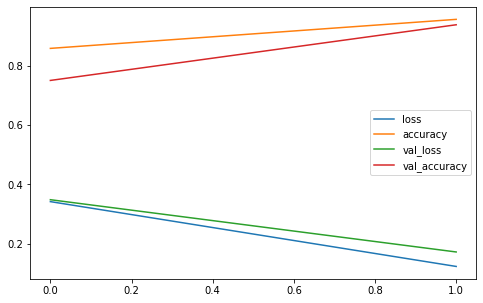

In [ ]:
#Plot for train and val accuracy and loss
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

## Task 5:
Use data-augmentation inbuilt in keras wisely **only for training**. Keep all model parameters same as Task 3 for comparison.


> ⏩ Hint: Data augmentation in Keras is very simple when using dataloader. Please carefully select the augmentation parameters in `ImageDataGenerator`. You may want to refer to https://keras.io/api/preprocessing/image/#imagedatagenerator-class for options available.

> Like last lab you have to show performance using accuracy (obtained from keras) and plotting confusion matrix <br>
> ⏩ Hint: You may want to use functions `from sklearn.metrics import confusion_matrix` , `from sklearn.metrics import classification_report`

🔷 Please write in comments why are you using those paramters for augmentation of X-Rays. If you do not write these comments, points will be deducted.

In [ ]:
# Create Image Data Generator for Train Set
image_gen_aug = ImageDataGenerator(
                                  rescale = 1./255, # Rescaling pixels to range [0 1] so that each of them contribute equally to the loss 
                                  zoom_range = 0.1, #It is possible that the distance between scanner and patient be different and hence different zoomed images
                                  rotation_range = 20, #It is possible for a person to not be standing straight during imaging
                                  shear_range = 0.1 #This can happen if the patient is not positioned correctly
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen_aug = ImageDataGenerator(rescale = 1./255)



train_img_aug = image_gen_aug.flow_from_directory(train_path,target_size=(500,500),
                                            color_mode='grayscale',
                                            class_mode='binary',batch_size=32)

test_img_aug = test_data_gen_aug.flow_from_directory(
      test_path,
      target_size=(500, 500),
      color_mode='grayscale',
      shuffle=False, 
      class_mode='binary',
      batch_size=32
      )

valid_img_aug = test_data_gen_aug.flow_from_directory(
      val_path,
      target_size=(500, 500),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=32
      )

# Using same model built previously
cnn_aug = Sequential()

cnn_aug.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn_aug.add(MaxPooling2D(pool_size = (2, 2)))

cnn_aug.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn_aug.add(MaxPooling2D(pool_size = (2, 2)))

cnn_aug.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn_aug.add(MaxPooling2D(pool_size = (2, 2)))

cnn_aug.add(Conv2D(64, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn_aug.add(MaxPooling2D(pool_size = (2, 2)))

cnn_aug.add(Conv2D(64, (3, 3), activation="relu", input_shape=(500, 500, 1)))
cnn_aug.add(MaxPooling2D(pool_size = (2, 2)))

cnn_aug.add(Flatten())

cnn_aug.add(Dense(activation = 'relu', units = 128))
cnn_aug.add(Dense(activation = 'relu', units = 64))
cnn_aug.add(Dense(activation = 'sigmoid', units = 1))

cnn_aug.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
#Fitting the model
history = cnn_aug.fit(train_img_aug,validation_data=valid_img_aug,epochs=2,verbose=1,batch_size=32)

Epoch 1/2
163/163 [==============================] - 168s 1s/step - loss: 0.3797 - accuracy: 0.8430 - val_loss: 0.8154 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 165s 1s/step - loss: 0.1879 - accuracy: 0.9277 - val_loss: 0.7820 - val_accuracy: 0.6875


In [ ]:
# Accuracy on test
test_accu = cnn_aug.evaluate(test_img_aug)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 8s 359ms/step - loss: 0.3775 - accuracy: 0.8494
The testing accuracy is : 84.93589758872986 %


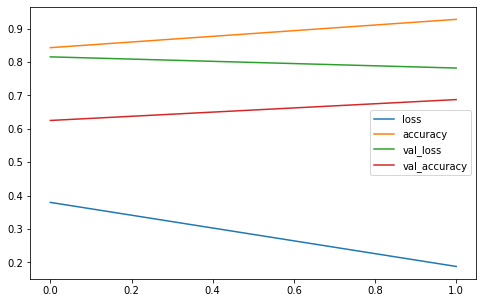

In [ ]:
#Plotting train, val accuracy and loss
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
# Predictions
preds = cnn_aug.predict(test_img_aug,verbose=1)

20/20 [==============================] - 302s 16s/step


In [ ]:
#Step needed becasue we used sigmoid in our last layer of model
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
#Classification Report
print(classification_report(y_true=test_img_aug.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.93      0.65      0.76       234
   PNEUMONIA       0.82      0.97      0.89       390

    accuracy                           0.85       624
   macro avg       0.87      0.81      0.83       624
weighted avg       0.86      0.85      0.84       624



In [ ]:
#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_true=test_img_aug.classes, y_pred=predictions)
print('Confusion Matrix')
print(confusion_matrix) 

Confusion Matrix
[[152  82]
 [ 12 378]]


## Task 6:
Compare results with and without data augmentation. Did it work? Why do you think it worked? Can you display some augmented data?

***The accuracy with data augmentation is better than without data augmentation. This can be because with data augmentation we create more data from our pre existing data to train our model in order to overcome the problem of less data.***

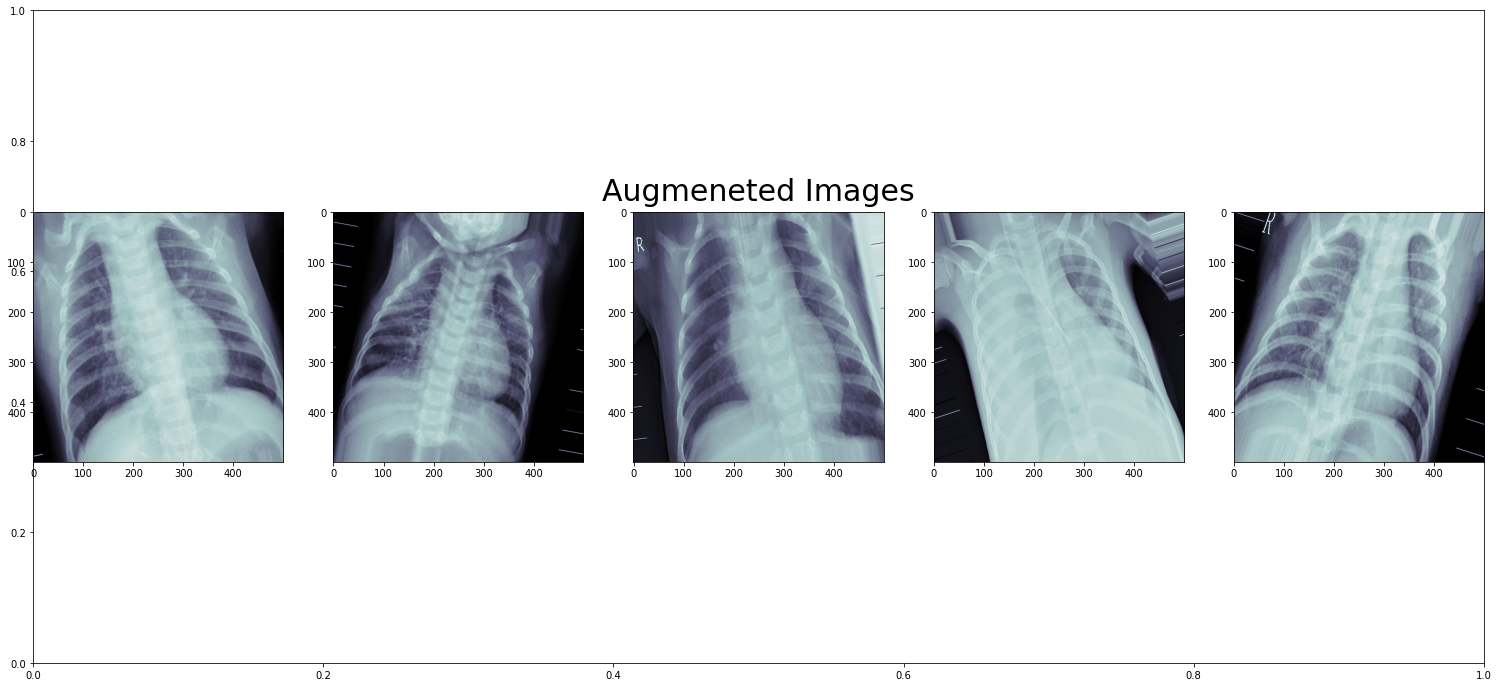

In [ ]:
a = 1
fig = plt.figure(num=None, figsize=(26, 12))
generated_image, label = train_img_aug.__getitem__(0)
plt.title('Augmeneted Images',y=0.7,fontsize=30)
for i in range(5):
  ax = fig.add_subplot(1, 5, a)
  img = np.squeeze(generated_image[a])
  imgplot = plt.imshow(img,cmap='bone')
  a+=1

# Part II
Visualization using Grad-CAM. 



## Task 7:
What is Grad-CAM? Why do you think Grad-CAM is useful? 
Please give a short summary of Grad-CAM (100-200 words)

You may want to read the paper here : https://arxiv.org/abs/1610.02391

 ***Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept, flowing into the final convolutional layer to produce a coarse localization map highlighting important regions in the image for predicting the concept. It is a popular technique for visualizing where a convolutional neural network model is looking. It is class-specific, meaning it can produce a separate visualization for every class present in the image.***

**GRAD-CAM is useful because using GRAD-CAM, we can visually validate where our network is looking, verifying that it is indeed looking at the correct patterns in the image and activating around those patterns.**
***If the network is not activating around the proper patterns/objects in the image, then we know***
*   **Our network hasn’t properly learned the underlying patterns in our dataset**
*   ***Our training procedure needs to be revisited***


## Task 8:
Visualize 6 samples in test data (3 per class) using Grad-CAM. For every data points, you plot the Grad-CAM image and also mention the predicted and true labels. <br> 

Feel free to use any open-source implementation, but **remember to explain clearly what each part of the code is doing** and cite the link you used the code from. If you do not write appropriate comments and give appropriate credits to original author, points will be deducted. 

In [112]:
#Source = https://keras.io/examples/vision/grad_cam/
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

test_filenames_N = glob.glob(test_path+'/NORMAL/*')
test_filenames_P = glob.glob(test_path+'/PNEUMONIA/*')

#display(Image(test_filenames[0]))

In [111]:
# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

In [113]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [114]:
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    return  superimposed_img


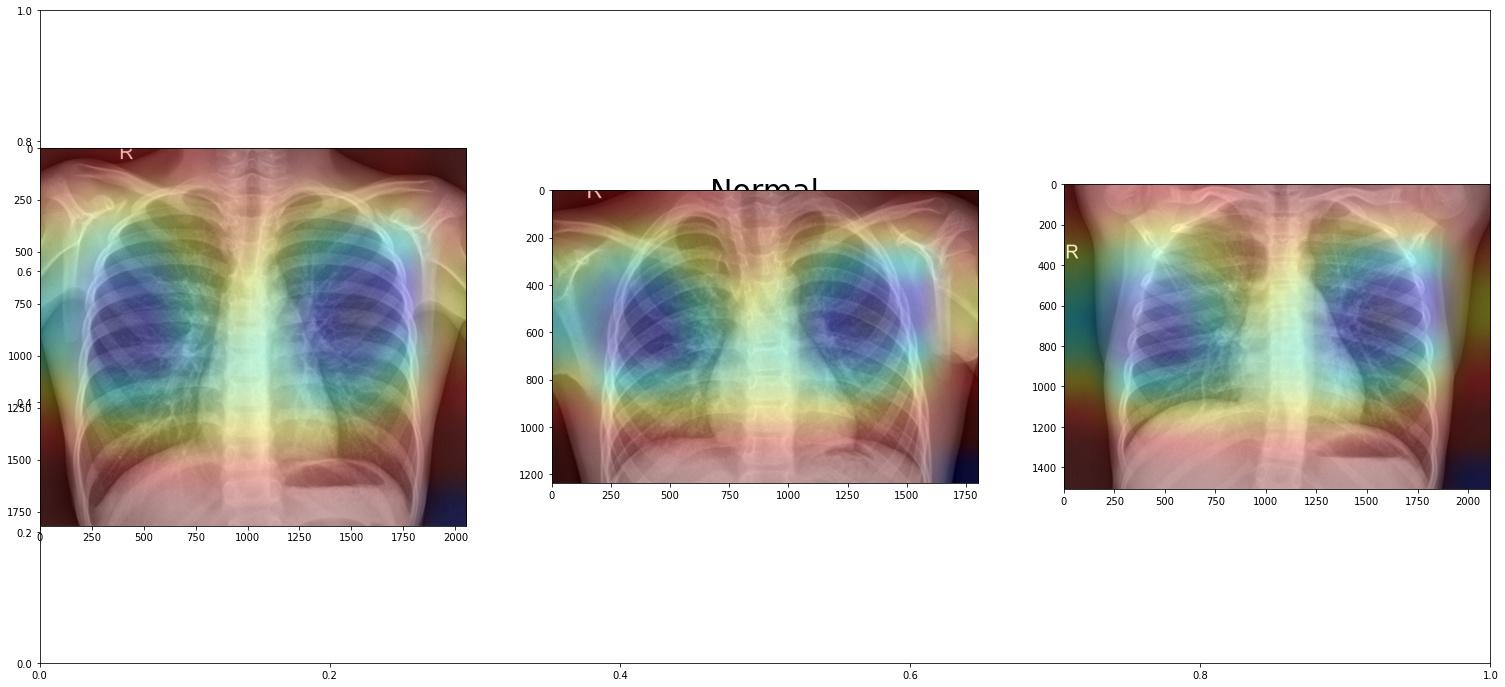

In [115]:
a = 1
fig = plt.figure(num=None, figsize=(26, 12))
plt.title('Normal',y=0.7,fontsize=30)
for i in range(3):
  ax = fig.add_subplot(1, 3, a)
  img = save_and_display_gradcam(test_filenames_N[i], heatmap)
  imgplot = plt.imshow(img)
  a+=1



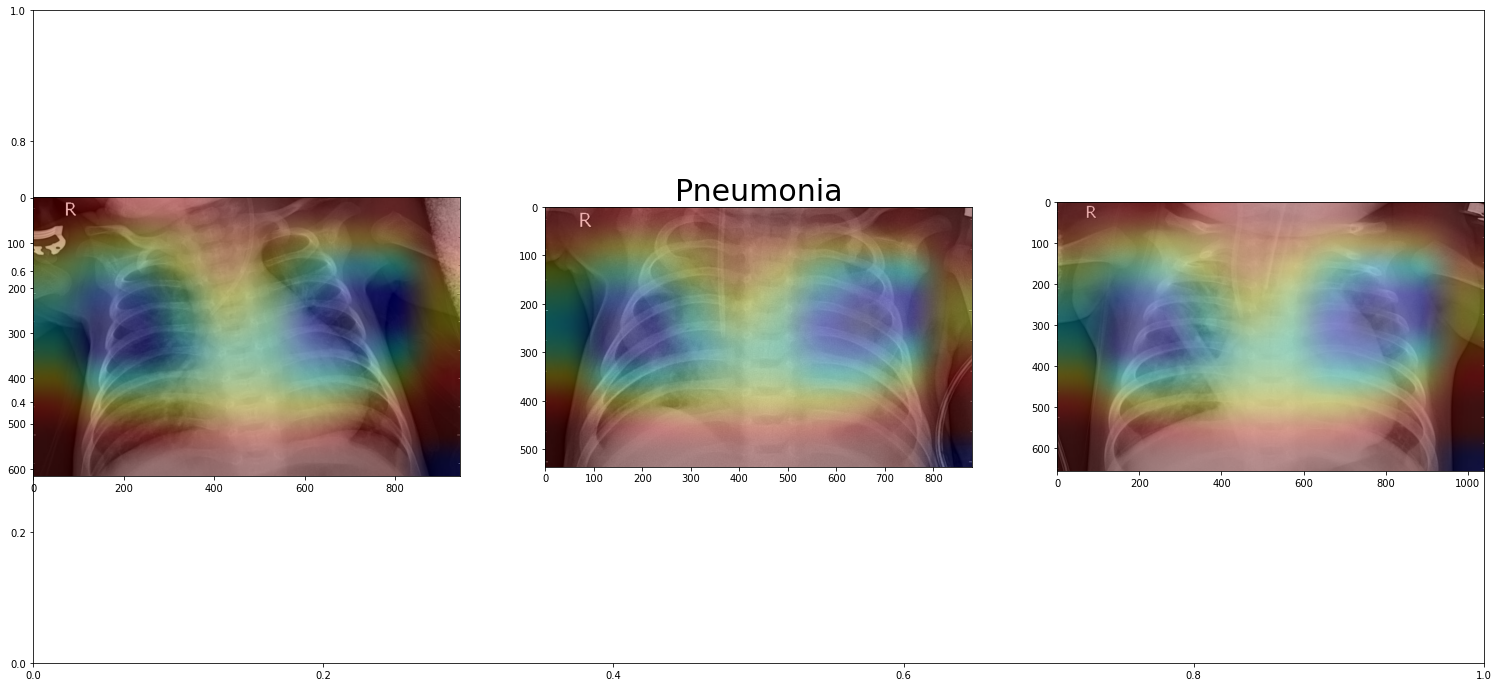

In [116]:
a = 1
fig = plt.figure(num=None, figsize=(26, 12))
plt.title('Pneumonia',y=0.7,fontsize=30)
for i in range(3):
  ax = fig.add_subplot(1, 3, a)
  img = save_and_display_gradcam(test_filenames_P[i], heatmap)
  imgplot = plt.imshow(img)
  a+=1

# Part III

Lung segmentation and transfer learning 

## Task 9:
Use lung segmentation as pre-processing to see if such augmentatin helps your models 
<br>

You can use this for segmentation: https://github.com/imlab-uiip/lung-segmentation-2d

You can also check this: https://github.com/jdariasl/COVIDNET from this paper: https://ieeexplore.ieee.org/abstract/document/9293268

In [ ]:
def remove_small_regions(img, size):
    """Morphologically removes small (less than size) connected regions of 0s or 1s."""
    img = morphology.remove_small_objects(img, size)
    img = morphology.remove_small_holes(img, size)
    return img


In [ ]:
def loadDataGeneral(path,im_shape):
  X = []
  image = cv2.imread(path)
  image = np.array(image)
  img = img_as_float(image)
  img = transform.resize(img,im_shape)
  img = exposure.equalize_hist(img)
  img = np.expand_dims(img, -1)
  X.append(img)
  X = np.array(X)
  X -= X.mean()
  X /= X.std()
  return X,img

In [ ]:
img_shape=(256,256)
model_name = '/content/drive/My Drive/Lab 7/trained_model.hdf5'
UNet = load_model(model_name)

In [ ]:
# For Train Normal Data
paths  =  glob.glob(train_path+'/NORMAL/*')
for i in range(len(paths)):
  X,img_org = loadDataGeneral(paths[i],img_shape)
  img = exposure.rescale_intensity(np.squeeze(X), out_range=(0,1))
  img = np.sum(img,axis=2)[None,:,:,None]
  pred =UNet.predict(img)
  pr = pred>0.5
  pr =  remove_small_regions(pr, 0.02 * np.prod(img_shape))
  #pr2 = np.squeeze(pr)
  pr_changed = np.expand_dims((np.squeeze(pr)),-1)
  segmented = np.squeeze(img_org)*pr_changed
  save_path = '/content/drive/My Drive/Lab 7/Train_Normal/'+paths[i].rpartition('/')[-1]
  io.imsave(save_path,img_as_ubyte(segmented))


In [ ]:
# For Train Pneumonia Data
paths  =  glob.glob(train_path+'/PNEUMONIA/*')
for i in range(len(paths)):
  X,img_org = loadDataGeneral(paths[i],img_shape)
  img = exposure.rescale_intensity(np.squeeze(X), out_range=(0,1))
  img = np.sum(img,axis=2)[None,:,:,None]
  pred =UNet.predict(img)
  pr = pred>0.5
  pr =  remove_small_regions(pr, 0.02 * np.prod(img_shape))
  #pr2 = np.squeeze(pr)
  pr_changed = np.expand_dims((np.squeeze(pr)),-1)
  segmented = np.squeeze(img_org)*pr_changed
  save_path = '/content/drive/My Drive/Lab 7/Train_Pneumonia/'+paths[i].rpartition('/')[-1]
  io.imsave(save_path,img_as_ubyte(segmented))


In [ ]:
# For Test Pneumonia Data
paths  =  glob.glob(test_path+'/PNEUMONIA/*')
for i in range(len(paths)):
  X,img_org = loadDataGeneral(paths[i],img_shape)
  img = exposure.rescale_intensity(np.squeeze(X), out_range=(0,1))
  img = np.sum(img,axis=2)[None,:,:,None]
  pred =UNet.predict(img)
  pr = pred>0.5
  pr =  remove_small_regions(pr, 0.02 * np.prod(img_shape))
  #pr2 = np.squeeze(pr)
  pr_changed = np.expand_dims((np.squeeze(pr)),-1)
  segmented = np.squeeze(img_org)*pr_changed
  save_path = '/content/drive/My Drive/Lab 7/Test_Pneumonia/'+paths[i].rpartition('/')[-1]
  io.imsave(save_path,img_as_ubyte(segmented))

In [ ]:
# For Test Normal Data
paths  =  glob.glob(test_path+'/NORMAL/*')
for i in range(len(paths)):
  X,img_org = loadDataGeneral(paths[i],img_shape)
  img = exposure.rescale_intensity(np.squeeze(X), out_range=(0,1))
  img = np.sum(img,axis=2)[None,:,:,None]
  pred =UNet.predict(img)
  pr = pred>0.5
  pr =  remove_small_regions(pr, 0.02 * np.prod(img_shape))
  #pr2 = np.squeeze(pr)
  pr_changed = np.expand_dims((np.squeeze(pr)),-1)
  segmented = np.squeeze(img_org)*pr_changed
  save_path = '/content/drive/My Drive/Lab 7/Test_Normal/'+paths[i].rpartition('/')[-1]
  io.imsave(save_path,img_as_ubyte(segmented))

In [ ]:
# For Val Pneumonia Data
paths  =  glob.glob(val_path+'/PNEUMONIA/*')
for i in range(len(paths)):
  X,img_org = loadDataGeneral(paths[i],img_shape)
  img = exposure.rescale_intensity(np.squeeze(X), out_range=(0,1))
  img = np.sum(img,axis=2)[None,:,:,None]
  pred =UNet.predict(img)
  pr = pred>0.5
  pr =  remove_small_regions(pr, 0.02 * np.prod(img_shape))
  #pr2 = np.squeeze(pr)
  pr_changed = np.expand_dims((np.squeeze(pr)),-1)
  segmented = np.squeeze(img_org)*pr_changed
  save_path = '/content/drive/My Drive/Lab 7/Val_Pneumonia/'+paths[i].rpartition('/')[-1]
  io.imsave(save_path,img_as_ubyte(segmented))

In [ ]:
# For Val Normal Data
paths  =  glob.glob(val_path+'/NORMAL/*')
for i in range(len(paths)):
  X,img_org = loadDataGeneral(paths[i],img_shape)
  img = exposure.rescale_intensity(np.squeeze(X), out_range=(0,1))
  img = np.sum(img,axis=2)[None,:,:,None]
  pred =UNet.predict(img)
  pr = pred>0.5
  pr =  remove_small_regions(pr, 0.02 * np.prod(img_shape))
  #pr2 = np.squeeze(pr)
  pr_changed = np.expand_dims((np.squeeze(pr)),-1)
  segmented = np.squeeze(img_org)*pr_changed
  save_path = '/content/drive/My Drive/Lab 7/Val_Normal/'+paths[i].rpartition('/')[-1]
  io.imsave(save_path,img_as_ubyte(segmented))

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


## Task 10:
Download a pretrained Desnsenet and finetune this network using the segmented images. Compare the accuracy with the earlier experiments


In [ ]:
train_path_seg = "/content/drive/My Drive/Lab 7/Train_Seg" 
val_path_seg = "/content/drive/My Drive/Lab 7/Val_Seg" 
test_path_seg = "/content/drive/My Drive/Lab 7/Test_Seg" 

In [ ]:
#Image Data Generator for Train Set
image_gen_seg = ImageDataGenerator(rescale=1./255)
#Image Data Generator for Test a
test_data_seg = ImageDataGenerator(rescale=1./255)
#Loading Images
train_img_seg = image_gen_seg.flow_from_directory(train_path_seg,target_size=(256,256),
                                            class_mode='binary',batch_size=32)

test_img_seg = test_data_seg.flow_from_directory(
      test_path,
      target_size=(256, 256),
      shuffle=False, 
      class_mode='binary',
      batch_size=32
      )

val_img_seg = image_gen_seg.flow_from_directory(
      val_path,
      target_size=(256, 256),
      class_mode='binary', 
      batch_size=32
      )


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
base_model = DenseNet121(input_shape=(256, 256, 3), include_top=False, weights='imagenet', pooling='avg')
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
den = model.fit(train_img_seg, epochs=20,validation_data=val_img_seg,verbose=1)

Epoch 1/20
163/163 [==============================] - 146s 892ms/step - loss: 0.1714 - accuracy: 0.9289 - val_loss: 9.6526 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 143s 877ms/step - loss: 0.1466 - accuracy: 0.9438 - val_loss: 14.9352 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 143s 877ms/step - loss: 0.1199 - accuracy: 0.9549 - val_loss: 1.7227 - val_accuracy: 0.5625
Epoch 4/20
163/163 [==============================] - 143s 876ms/step - loss: 0.1002 - accuracy: 0.9624 - val_loss: 14.4022 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 143s 877ms/step - loss: 0.1070 - accuracy: 0.9586 - val_loss: 8.1981 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 143s 877ms/step - loss: 0.0883 - accuracy: 0.9649 - val_loss: 9.7580 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 143s 877ms/step - loss: 0.0724 - accuracy: 0.9741 - val_loss: 1.8117

In [ ]:
test_accu = model.evaluate(test_img_seg)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 9s 418ms/step - loss: 11.6593 - accuracy: 0.6250
The testing accuracy is : 62.5 %
